In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
import keras
from keras.optimizers import *
from keras.initializers import *
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/sample_data/Book1f.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 8 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   How did you fare in obtaining the internships in comparison to your colleagues?  424 non-null    object 
 1   KW                                                                               424 non-null    int64  
 2   LS                                                                               424 non-null    float64
 3   CO                                                                               424 non-null    int64  
 4   PS                                                                               424 non-null    float64
 5   DM                                                                               424 non-null    float64
 6   CR         

In [ ]:
df.head()

,How did you fare in obtaining the internships in comparison to your colleagues?,KW,LS,CO,PS,DM,CR,TW
0,better,10,0.0,0,0.0,0.0,5.0,0.0
1,easy,40,0.0,0,10.0,0.0,5.0,0.0
2,better,25,2.0,0,5.0,6.0,10.0,6.0
3,better,35,0.5,3,17.0,3.0,16.5,2.5
4,easy,45,0.0,0,19.5,4.5,13.5,5.0


In [ ]:
# Preprocess the data
label_encoder = LabelEncoder()
df['How did you fare in obtaining the internships in comparison to your colleagues?'] = label_encoder.fit_transform(df['How did you fare in obtaining the internships in comparison to your colleagues?'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 8 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   How did you fare in obtaining the internships in comparison to your colleagues?  424 non-null    int64  
 1   KW                                                                               424 non-null    int64  
 2   LS                                                                               424 non-null    float64
 3   CO                                                                               424 non-null    int64  
 4   PS                                                                               424 non-null    float64
 5   DM                                                                               424 non-null    float64
 6   CR         

In [ ]:
df.head()

,How did you fare in obtaining the internships in comparison to your colleagues?,KW,LS,CO,PS,DM,CR,TW
0,0,10,0.0,0,0.0,0.0,5.0,0.0
1,1,40,0.0,0,10.0,0.0,5.0,0.0
2,0,25,2.0,0,5.0,6.0,10.0,6.0
3,0,35,0.5,3,17.0,3.0,16.5,2.5
4,1,45,0.0,0,19.5,4.5,13.5,5.0


In [ ]:
feature_name = ["KW", "LS","CO","PS", "DM", "CR","TW"]
dfX = df[feature_name]
dfY = df["How did you fare in obtaining the internships in comparison to your colleagues?"]

In [ ]:
dfX.head()

,KW,LS,CO,PS,DM,CR,TW
0,10,0.0,0,0.0,0.0,5.0,0.0
1,40,0.0,0,10.0,0.0,5.0,0.0
2,25,2.0,0,5.0,6.0,10.0,6.0
3,35,0.5,3,17.0,3.0,16.5,2.5
4,45,0.0,0,19.5,4.5,13.5,5.0


In [ ]:
dfY.head()

0    0
1    1
2    0
3    0
4    1
Name: How did you fare in obtaining the internships in comparison to your colleagues?, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.20, random_state=1)


In [ ]:
X_train.head()

,KW,LS,CO,PS,DM,CR,TW
292,55,23.0,14,27.0,19.0,27.0,20.0
85,25,3.0,0,10.0,2.0,10.0,2.0
328,40,7.0,8,12.5,5.5,12.5,7.0
81,45,7.0,7,22.0,4.0,12.0,7.0
287,30,3.0,4,10.0,1.0,10.0,5.0


In [ ]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(128,activation='relu',
    input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
    return model

In [ ]:
import numpy as np
k = 2
num_val_samples = len(X_train) // k
num_epochs =200
all_acc_histories = []
all_loss_histories=[]

for i in range(k):
    print('processing fold #', i)
    #Prepares the validation data:data from partition #k
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    #Prepares the training data: data from all other partitions
    partial_train_data = np.concatenate(
    [X_train[:i * num_val_samples],
    X_train[(i + 1) * num_val_samples:]],
    axis=0)

    partial_train_targets = np.concatenate(
    [y_train[:i * num_val_samples],
    y_train[(i + 1) * num_val_samples:]],
    axis=0)

    #Builds the Keras model (already compiled)
    model = build_model()

    #Trains the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, verbose=0)
    acc_history = history.history['acc']
    all_acc_histories.append(acc_history)
    loss_history = history.history['loss']
    all_loss_histories.append(loss_history)

processing fold # 0
processing fold # 1


In [ ]:
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
# average_mae_history = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]
average_loss_history = [np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]


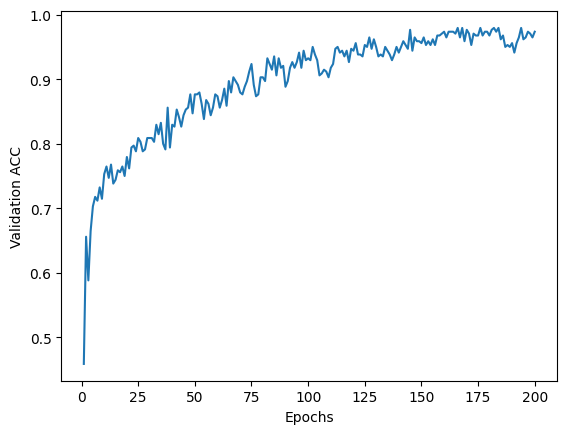

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Validation ACC')
plt.show()

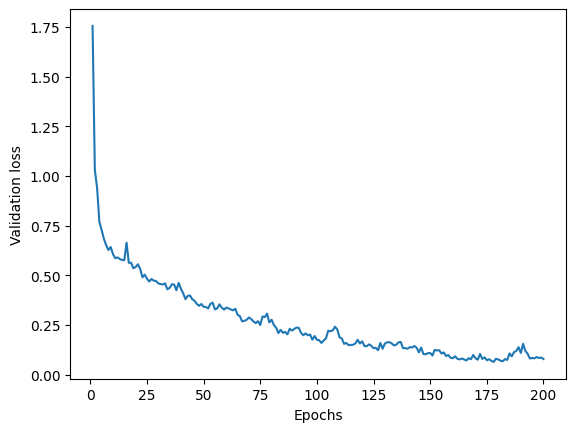

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.show()

In [ ]:
# Save the model
#model.save('model.h5')

In [ ]:
#print(X_test)

     KW    LS  CO    PS    DM    CR    TW
172  10   2.0   6   0.0   2.0   5.0   3.0
78   45   2.0   3  22.0   8.0  17.0   3.0
122  30   3.0   7  20.5   7.5  10.5   4.0
376  50  10.0  12  26.0   6.0  15.5   9.0
146  25   3.0   7   5.0   2.5  10.0   4.5
..   ..   ...  ..   ...   ...   ...   ...
351  40   3.0   7  25.0  12.0  20.0   3.0
420  40   3.0   7  23.0   8.0   9.0   9.0
214  20   5.0   4   5.0   1.0  10.0   4.0
80   15   0.0   3   5.5   1.5  10.5   2.0
46   50   6.0  11  19.0   8.0  18.0  16.0

[85 rows x 7 columns]


In [ ]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [ ]:
#Making predictions and evaluating the model
score, acc = model.evaluate(X_train, y_train,
                            )
print('Train score:', score)
print('Train accuracy:', acc)


print('*'*20)
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

11/11 [==============================] - 0s 4ms/step - loss: 1.1225 - acc: 0.8230
Train score: 1.1225330829620361
Train accuracy: 0.8230088353157043
********************
3/3 [==============================] - 0s 7ms/step - loss: 2.0818 - acc: 0.6000
Test score: 2.081843376159668
Test accuracy: 0.6000000238418579


In [ ]:
print(y_pred)

[[3.58538577e-09 4.11361647e-08 9.99999940e-01]
 [9.99992788e-01 8.57125149e-10 7.09835422e-06]
 [1.44954361e-02 9.83824551e-01 1.67988439e-03]
 [9.40385580e-01 5.96139878e-02 3.92566534e-07]
 [3.17818682e-09 5.00342276e-06 9.99994934e-01]
 [9.98128355e-01 1.87090260e-03 7.04513411e-07]
 [8.70788842e-02 9.12921250e-01 3.97317947e-08]
 [9.86224294e-01 4.39343534e-10 1.37757156e-02]
 [1.12388134e-01 9.85201076e-03 8.77759814e-01]
 [2.47925058e-01 7.52074957e-01 1.47215395e-08]
 [9.96939301e-01 3.06036207e-03 1.79025733e-07]
 [8.44081161e-09 2.56422680e-07 9.99999702e-01]
 [2.85931188e-03 9.97140765e-01 4.82026788e-12]
 [1.06515458e-07 2.28394992e-08 9.99999821e-01]
 [2.87518948e-01 7.12480843e-01 2.31736323e-07]
 [9.78044868e-01 2.17412263e-02 2.13818450e-04]
 [9.99999702e-01 2.07779438e-09 2.38814465e-07]
 [5.86121917e-01 1.13786909e-05 4.13866729e-01]
 [8.50813463e-04 1.11012662e-06 9.99147952e-01]
 [8.94418266e-03 1.11114502e-01 8.79941344e-01]
 [9.99968708e-01 4.15478851e-09 3.124627

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Convert probability values to class labels
y_pred = np.argmax(y_pred, axis=1)

#cm_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
#columns=['better','easy','hard'],
#index=['better','easy','hard'])

#cm_matrix_coef = cm_matrix/cm_matrix.sum(axis=1)

In [ ]:
print(y_pred)

[2 0 1 0 2 0 1 0 2 1 0 2 1 2 1 0 0 0 2 2 0 2 1 2 2 2 0 0 0 1 0 0 0 0 0 2 0
 1 0 0 1 1 1 2 0 2 0 1 0 1 0 0 0 0 1 1 0 0 2 0 0 0 1 0 0 1 0 0 0 1 1 1 0 2
 0 0 0 2 0 0 0 0 2 2 0]


In [ ]:
cm_matrix = pd.DataFrame(data=confusion_matrix(y_test, y_pred),
columns=['better','easy','hard'],
index=['better','easy','hard'])

cm_matrix_coef = cm_matrix/cm_matrix.sum(axis=1)

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='macro')

0.5613719613719613

In [ ]:
cm_matrix

,better,easy,hard
better,29,15,1
easy,11,4,0
hard,6,1,18


In [ ]:
cm_matrix_coef.style.background_gradient(cmap="Blues")

,better,easy,hard
better,0.644444,1.000000,0.040000
easy,0.244444,0.266667,0.000000
hard,0.133333,0.066667,0.720000


In [ ]:
import pandas as pd

# Assuming X_test and y_test are originally NumPy arrays
# Convert them to lists if needed
X_test = X_test.tolist()
y_test = y_test.tolist()

# Create a Pandas DataFrame for the splitted test dataset
df_test = pd.DataFrame({
    'X': X_test,
    'y': y_test
})

# Now df_test should be correctly created with X and y as columns



AttributeError: ignored

In [ ]:
import pandas as pd

# Create a list of DataFrames
frames = [df[" KW"], df["LS"],df["CO"],df["PS"],df["DM"],df["CR"],df["TW"]]

# Save the list of DataFrames to a file
df_list = pd.DataFrame(frames)
df_list.to_csv('frames.csv')
